In [181]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv("housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [116]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [117]:
target = df['median_house_value']
target

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [118]:
inputs = df.drop('median_house_value',axis='columns')
inputs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
# converts categorical data into dummy numerical values using pandas.get_dummies() method.

In [119]:
dummies = pd.get_dummies(df.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [120]:
merged = pd.concat([df,dummies],axis="columns")
merged

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [121]:
final = merged.drop(['ocean_proximity','INLAND'],axis='columns')
final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,0,0,0


In [122]:
x=final.drop('median_house_value',axis='columns')
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,0,0,0


In [123]:
y = df['median_income']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [159]:
df_bedrooms = final[['total_bedrooms']]
df_bedrooms

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [160]:
df_bedrooms.isnull().sum()

total_bedrooms    207
dtype: int64

In [ ]:
#Replace missing values using SimpleImputer

In [161]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(df_bedrooms)
X_imputed = imputer.transform(df_bedrooms)
X_imputed

array([[ 129.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

In [ ]:
#convert array into dataframe

In [162]:
convert_to_df = pd.DataFrame(X_imputed,columns=['median_bedrooms'])
convert_to_df

,median_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [ ]:
#concat the above dataframe into main dataframe

In [168]:
merged_with_final = pd.concat([final,convert_to_df],axis='columns')
merged_with_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN,median_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,129.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,1106.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,190.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,235.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,0,0,0,374.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,0,0,0,150.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,0,0,0,485.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,0,0,0,409.0


In [169]:
merged_with_final = merged_with_final.drop('total_bedrooms',axis='columns')
merged_with_final

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN,median_bedrooms
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,1,0,129.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,1106.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0,190.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0,235.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,0,0,0,374.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,0,0,0,150.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,0,0,0,485.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,0,0,0,409.0


In [ ]:
#Data points that are far from 99% percentile and less than 1 percentile are considered an outlier.

In [176]:
df_outlier = merged_with_final['median_income']
df_outlier.shape

(20640,)

In [177]:
percentile_99 = df_outlier.quantile(0.99)

In [178]:
merged_with_final[df_outlier>percentile_99]

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN,median_bedrooms
131,-122.19,37.84,18.0,1617.0,533.0,194.0,11.6017,392600.0,0,0,1,0,210.0
510,-122.22,37.82,39.0,2492.0,808.0,315.0,11.8603,500001.0,0,0,1,0,310.0
511,-122.22,37.82,42.0,2991.0,1018.0,335.0,13.4990,500001.0,0,0,1,0,335.0
512,-122.23,37.82,52.0,3242.0,1001.0,352.0,12.2138,500001.0,0,0,1,0,366.0
514,-122.23,37.82,52.0,3494.0,1192.0,383.0,12.3804,500001.0,0,0,1,0,396.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18366,-122.08,37.24,21.0,427.0,182.0,70.0,11.3283,500001.0,1,0,0,0,63.0
18501,-121.59,37.19,52.0,220.0,55.0,26.0,15.0001,131300.0,1,0,0,0,32.0
18504,-121.96,37.13,26.0,50.0,17.0,4.0,15.0001,400000.0,1,0,0,0,5.0
20163,-119.31,34.44,5.0,403.0,208.0,54.0,12.6320,500001.0,0,0,0,1,48.0


In [179]:
final_outlier = merged_with_final[df_outlier<=percentile_99]
final_outlier.shape

(20433, 13)

In [180]:
final_outlier

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN,median_bedrooms
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,0,0,1,0,129.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,1106.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0,190.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0,235.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,0,0,0,374.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,0,0,0,150.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,0,0,0,485.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,0,0,0,409.0


In [ ]:
#split the dependent and independent variables

In [182]:
X = final_outlier.drop(['median_house_value'],axis='columns')
X

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN,median_bedrooms
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,0,0,1,0,129.0
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,0,0,1,0,1106.0
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,0,0,1,0,190.0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,0,0,1,0,235.0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,0,0,1,0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,0,0,0,0,374.0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,0,0,0,0,150.0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,0,0,0,0,485.0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,0,0,0,0,409.0


In [183]:
Y = final_outlier['median_house_value']
Y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
#using train_test_split() method to estimate the performance of machine learning algorithms

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=42)
len(X_train)

16346

In [187]:
len(X_test)

4087

In [188]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [189]:
clf.predict(X_test)

array([331307.21889277,  66262.85340652, 302946.13090362, ...,
       258919.03430718, 276833.48752581, 233262.22373352])

In [191]:
y_test

14413    342200.0
16379    106300.0
7726     183700.0
1408     235700.0
1334     161700.0
           ...   
8284     307400.0
6271     150800.0
2990      59500.0
13448     92000.0
14796    127600.0
Name: median_house_value, Length: 4087, dtype: float64

In [192]:
clf.score(X_test,y_test)

0.625520542169322

In [194]:
final_outlier.corr()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN,median_bedrooms
longitude,1.000000,-0.924455,-0.109049,0.044262,0.099686,0.054738,-0.013163,-0.045639,0.319216,0.009479,-0.473562,0.048110,0.068603
latitude,-0.924455,1.000000,0.011639,-0.035508,-0.109547,-0.071450,-0.083318,-0.145690,-0.446008,-0.016655,0.357246,-0.163273,-0.066850
housing_median_age,-0.109049,0.011639,1.000000,-0.363482,-0.296636,-0.303602,-0.150000,0.103775,0.045054,0.017172,0.255931,0.022363,-0.319846
total_rooms,0.044262,-0.035508,-0.363482,1.000000,0.857859,0.919584,0.223039,0.136421,-0.004044,-0.007594,-0.022463,-0.009467,0.928384
population,0.099686,-0.109547,-0.296636,0.857859,1.000000,0.906811,0.027606,-0.015906,0.075976,-0.010504,-0.060292,-0.023607,0.872980
households,0.054738,-0.071450,-0.303602,0.919584,0.906811,1.000000,0.038298,0.078442,0.043459,-0.009171,-0.008898,0.002761,0.974250
median_income,-0.013163,-0.083318,-0.150000,0.223039,0.027606,0.038298,1.000000,0.671972,0.175546,-0.009644,0.056773,0.020749,0.015412
median_house_value,-0.045639,-0.145690,0.103775,0.136421,-0.015906,0.078442,0.671972,1.000000,0.258421,0.024585,0.162407,0.142004,0.061827
<1H OCEAN,0.319216,-0.446008,0.045054,-0.004044,0.075976,0.043459,0.175546,0.258421,1.000000,-0.013899,-0.313053,-0.340485,0.018806
ISLAND,0.009479,-0.016655,0.017172,-0.007594,-0.010504,-0.009171,-0.009644,0.024585,-0.013899,1.000000,-0.005513,-0.005996,-0.004403


Text(158.08159722222223, 0.5, 'Truth')

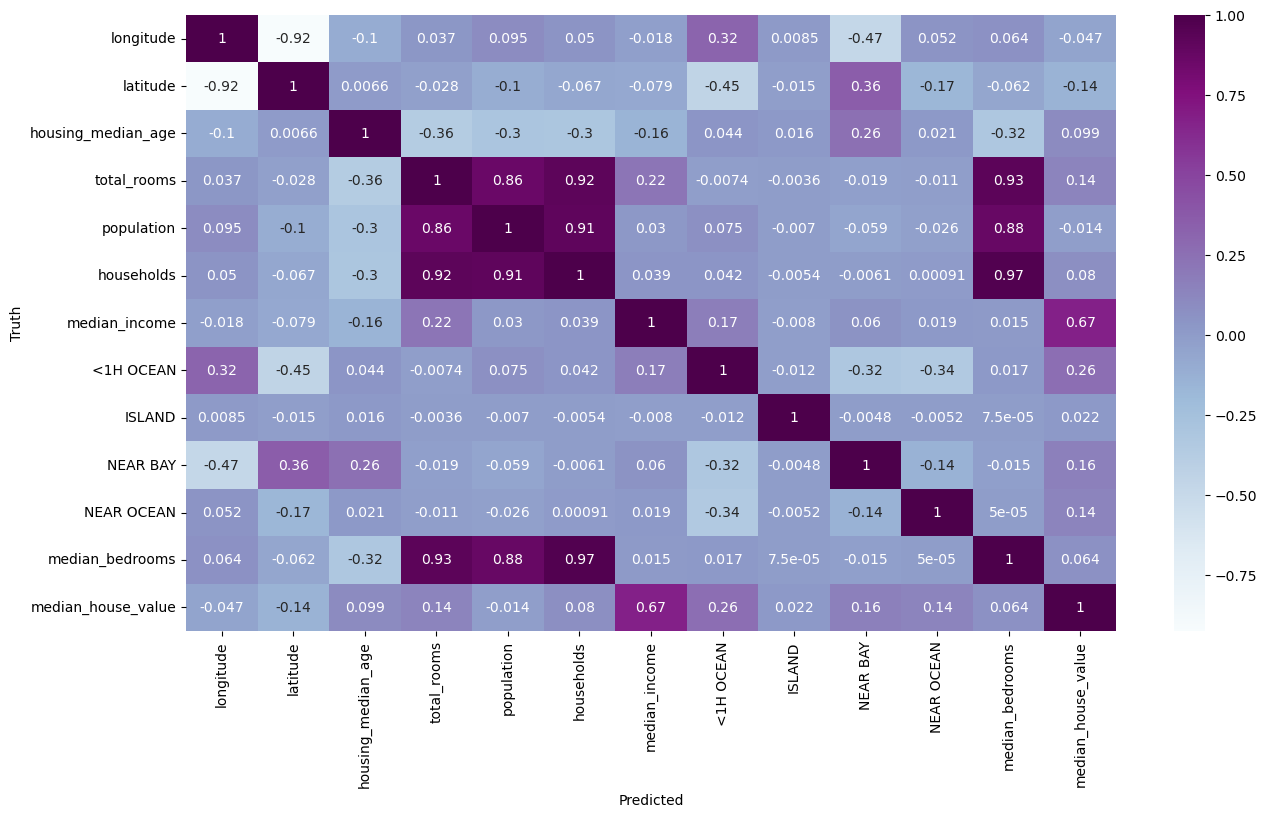

In [199]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(final_outlier.corr(),annot=True,cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [200]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [203]:
X_test

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,<1H OCEAN,ISLAND,NEAR BAY,NEAR OCEAN,median_bedrooms
14413,-117.24,32.78,44.0,2172.0,892.0,420.0,4.1742,0,0,0,1,431.0
16379,-121.30,38.02,16.0,2717.0,3343.0,643.0,2.5473,0,0,0,0,621.0
7726,-118.12,33.92,27.0,6336.0,4673.0,1505.0,2.5893,1,0,0,0,1628.0
1408,-122.06,37.94,19.0,4005.0,1896.0,893.0,2.5268,0,0,1,0,972.0
1334,-121.86,38.00,16.0,3216.0,1504.0,453.0,5.2500,0,0,0,0,464.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8284,-118.14,33.77,49.0,2792.0,1301.0,648.0,3.2917,0,0,0,1,690.0
6271,-117.95,34.04,27.0,2610.0,2296.0,750.0,2.2740,1,0,0,0,846.0
2990,-118.99,35.32,35.0,1576.0,870.0,282.0,1.6575,0,0,0,0,405.0
13448,-117.41,34.10,5.0,4937.0,2204.0,812.0,2.5272,0,0,0,0,1139.0


In [204]:
y_test

14413    342200.0
16379    106300.0
7726     183700.0
1408     235700.0
1334     161700.0
           ...   
8284     307400.0
6271     150800.0
2990      59500.0
13448     92000.0
14796    127600.0
Name: median_house_value, Length: 4087, dtype: float64

In [206]:
forest.predict(X_test)

array([363098.18, 102971.  , 171101.  , ...,  57067.  , 104934.  ,
       123299.  ])

In [207]:
forest.score(X_test,y_test)

0.8055192945164968